In [59]:
import csv
from matplotlib import pyplot as plt
import numpy as np

def plot_2l(ax, model,fig):

    with open(f'HEPData-ins1767649-v5-Figure_{fig}_Expected.csv') as exp_csvfile:
        exp = np.genfromtxt(exp_csvfile, skip_header=8,delimiter=',')
    with open(f'HEPData-ins1767649-v5-Figure_{fig}_Observed.csv') as obs_csvfile:
        obs = np.genfromtxt(obs_csvfile, skip_header=8,delimiter=',')
    plot(ax,exp,obs, model)

    
def plot_comb(ax, model, fig):
    with open(f'HEPData-ins1866951-v2-{fig}_(Delta_m),_Exp.csv') as exp_csvfile:
        exp = np.genfromtxt(exp_csvfile, skip_header=9,delimiter=',')
    with open(f'HEPData-ins1866951-v2-{fig}_(Delta_m),_Obs.csv') as obs_csvfile:
        obs = np.genfromtxt(obs_csvfile, skip_header=9,delimiter=',')
    plot(ax,exp,obs, model)

    
def plot(ax,exp,obs, model):
    exp_x_at_obs = np.interp(obs[:,1],exp[:,1],exp[:,0])
    ax.plot(obs[:,1],exp_x_at_obs-obs[:,0])
    ax.set_title(model)
    ax.set_ylabel("Observed - Expected [GeV]")
    ax.set_xlabel("$Delta m [GeV]")
    ax.set_ylim((0,60))
    ax.set_ylim((0,60))
    ax.set_xlim((0,60))

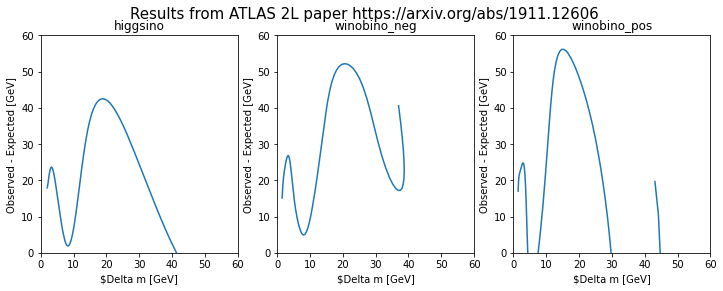

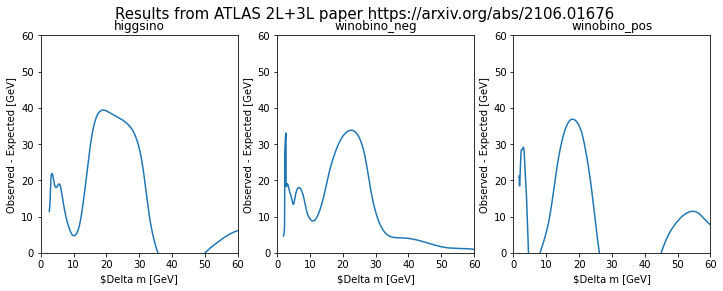

In [60]:
models_2l = {
    'higgsino':'14a',
    'winobino_neg':'14b',
    'winobino_pos':'14c',
}

models_comb = {
    'higgsino':'Fig_16d_WZ_Exclusion__Higgsino',
    'winobino_neg':'Fig_16c_WZ_Exclusion__Wino-bino(-)',
    'winobino_pos':'Fig_16b_WZ_Exclusion__Wino-bino(+)',
}

fig, ax = plt.subplots(1,3,figsize=(12,4))
fig.suptitle('Results from ATLAS 2L paper https://arxiv.org/abs/1911.12606', fontsize=15)
for i,(modelname, modelfig) in enumerate(models_2l.items()):
    plot_2l(ax[i],modelname, modelfig)

fig, ax = plt.subplots(1,3,figsize=(12,4))
fig.suptitle('Results from ATLAS 2L+3L paper https://arxiv.org/abs/2106.01676', fontsize=15)
for i,(modelname, modelfig) in enumerate(models_comb.items()):
    plot_comb(ax[i],modelname, modelfig)